In [ ]:
#Red Neuronal Convolucional aplicadas en
#Fashion MNIST

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Cargar conjunto de datos

#Cargue del conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

#Cargue la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#Normalizar los valores de pixeles del tren y probar las imágenes
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Construcción del modelo
#Construir el modelo de clasificación

model = keras.Sequential([
    #Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3946 - accuracy: 0.8601
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2674 - accuracy: 0.9023
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2241 - accuracy: 0.9178
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1911 - accuracy: 0.9294
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1645 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1400 - accuracy: 0.9479
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1209 - accuracy: 0.9556
Epoch 8/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1029 - accuracy: 0.9626
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0866 - accuracy: 0.9692
Epoch 10/10
1875/1875 [==============================] - 42s 22m

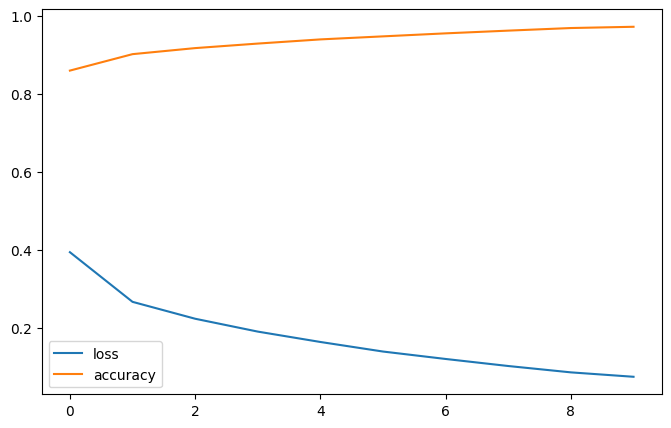

In [ ]:
#Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0577 - accuracy: 0.9802
Pérdida en el conjunto de entrenamiento: 0.057700563222169876
Precisión en el conjunto de entrenamiento: 0.9802166819572449
313/313 [==============================] - 2s 6ms/step - loss: 0.3277 - accuracy: 0.9125
Pérdida en el conjunto de prueba: 0.3277074098587036
Precisión en el conjunto de prueba: 0.9125000238418579


In [ ]:
#Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')
#plt.imshow(test_images[index])
#plt.show()

Label: 2
1/1 [==============================] - 0s 130ms/step
Classification:
 [[8.7522885e-06]
 [1.2538707e-13]
 [9.9998856e-01]
 [3.2800047e-12]
 [1.2589869e-06]
 [4.5272137e-12]
 [1.4492289e-06]
 [4.9008299e-16]
 [6.1540067e-17]
 [3.9523003e-12]]


In [ ]:
#Después de realizar el entrenamiento vamos a ejecutar un código que permite
#Visualizar las convoluciones y Pooling

#Preparación de los datos
print(test_labels[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [ ]:
#Selección de imágenes de interés

FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: 1
Label: 4
Label: 4


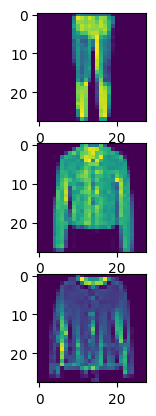

In [ ]:
#Visualización de imágenes
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])


In [ ]:
#Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)



1/1 [==============================] - 0s 26ms/step


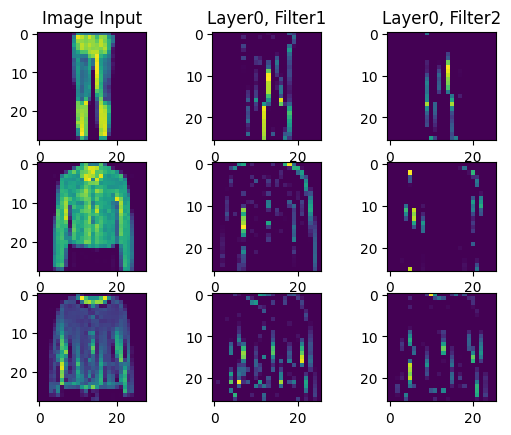

In [ ]:
#Visualización de convoluciones

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28))[layer]
axarr[0,1].set_title('Layer' + str(layer)+ ', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer' + str(layer)+ ', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])


Label: 1
Label: 1
Label: 4
1/1 [==============================] - 0s 21ms/step


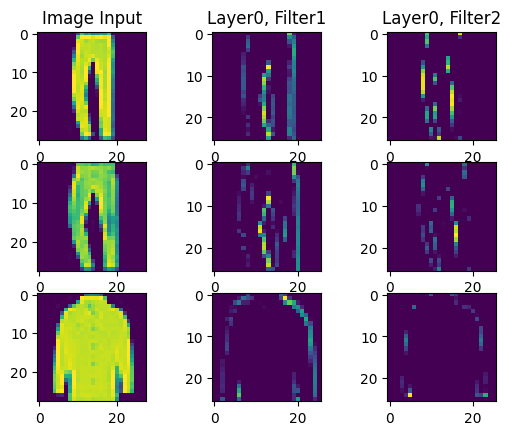

In [ ]:
#seleccionando elementos etiquetados como 7 tenemos

FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28))[layer]
axarr[0,1].set_title('Layer' + str(layer)+ ', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer' + str(layer)+ ', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])